# Pytorch DNN 手寫辨識

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [14]:
# 準備資料集
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [15]:
# 建構DNN模型
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = DNN()

In [16]:
# 定義損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [17]:
# 用於紀錄準確率和損失的列表
train_loss_history = []
train_accuracy_history = []

In [20]:
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # 计算平均损失和准确率
    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total

    # 记录每个epoch的准确率和损失
    train_loss_history.append(avg_loss)
    train_accuracy_history.append(accuracy)

    print(f"Epoch {epoch+1}, Loss: {avg_loss}, Accuracy: {accuracy}%")

Epoch 1, Loss: 0.04130865288225672, Accuracy: 98.68%
Epoch 2, Loss: 0.035100854836331845, Accuracy: 98.86833333333334%
Epoch 3, Loss: 0.032188846384669574, Accuracy: 98.97833333333334%
Epoch 4, Loss: 0.026062322436022196, Accuracy: 99.175%
Epoch 5, Loss: 0.02127039492838514, Accuracy: 99.32833333333333%
Epoch 6, Loss: 0.018557820259394852, Accuracy: 99.40666666666667%
Epoch 7, Loss: 0.016497544035551818, Accuracy: 99.46333333333334%
Epoch 8, Loss: 0.015318325198921826, Accuracy: 99.52666666666667%
Epoch 9, Loss: 0.01285370143989512, Accuracy: 99.59166666666667%
Epoch 10, Loss: 0.007656211916895048, Accuracy: 99.80166666666666%


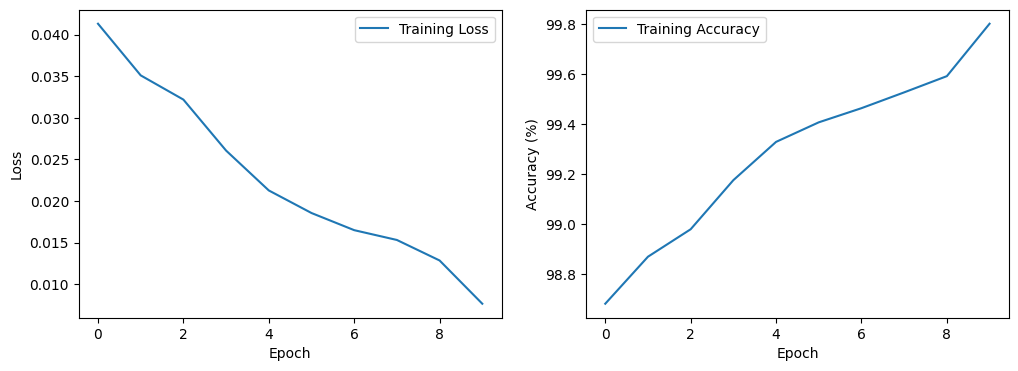

In [21]:
# 繪製準確率和損失圖表
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()